<a href="https://colab.research.google.com/github/divyanshi-varshney2002/Automated_loan_approval_System/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

In [74]:
# import library for read,write and perform basic operations
import pandas as pd
import numpy as np

In [75]:
# library for visualization
import matplotlib.pyplot as plt # used for 2d graphics
import seaborn as sns # present things in simple way as compared to matplotlib
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [76]:
# for evaluating the model
from sklearn.metrics import accuracy_score

In [77]:
# for warnings
import warnings
warnings.filterwarnings("ignore")

**Reading the data**

In [78]:
df= pd.read_csv("financial_data.csv")
df

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

**Explore the data**

In [80]:
# finding the count of each class of dependent variable
print(sum(df["e_signed"]==0))
print(sum(df["e_signed"]==1))

8269
9639


In [81]:
# checking the percentage for null values in each column
percent_missing = df.isnull().sum()*100 /len(df)
missing_value_df = pd.DataFrame({"percent_missing": percent_missing})
missing_value_df

,percent_missing
entry_id,0.0
age,0.0
pay_schedule,0.0
home_owner,0.0
income,0.0
months_employed,0.0
years_employed,0.0
current_address_year,0.0
personal_account_m,0.0
personal_account_y,0.0


In [82]:
# drop unnecessary columns
dataset2=df.drop(columns=['entry_id','pay_schedule','e_signed'])
dataset2

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,31,0,3245,0,5,3,2,6,1,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2
17904,46,0,6525,0,2,1,3,3,1,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3
17905,46,0,2685,0,5,1,1,8,1,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9
17906,42,0,2515,0,3,5,6,1,1,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3


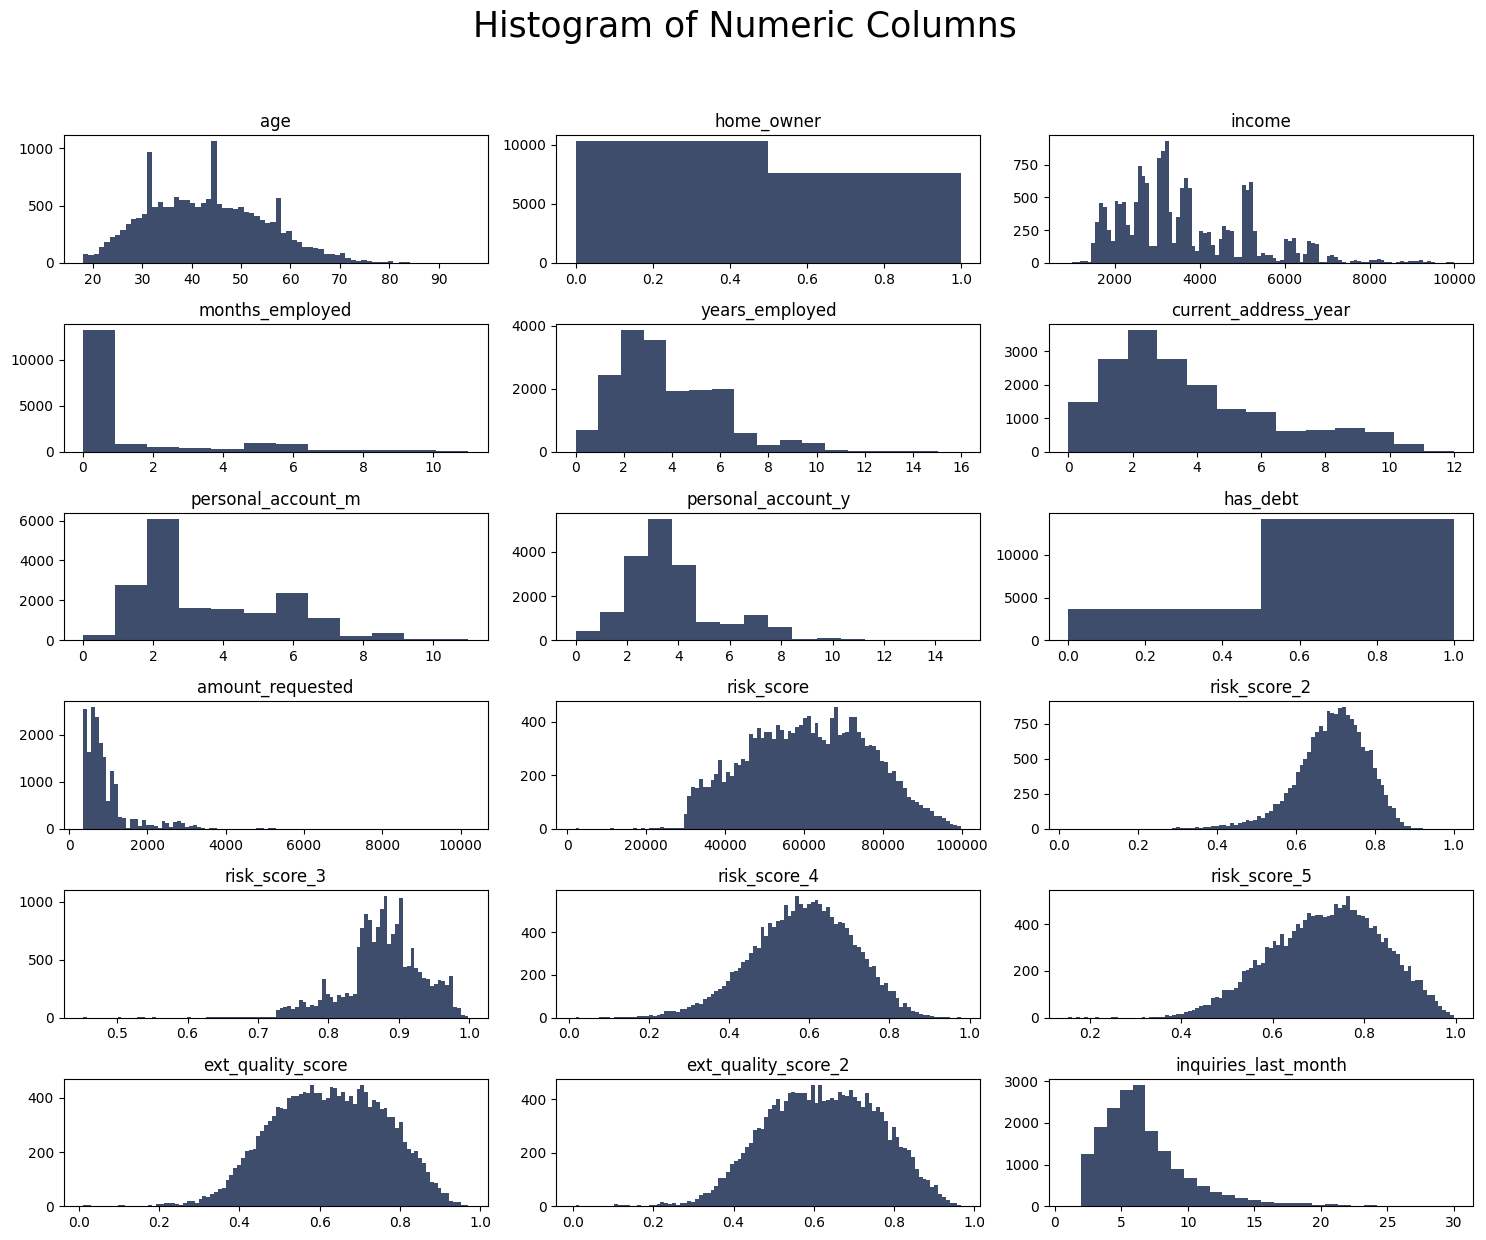

In [83]:
# plot the histogram
fig = plt.figure(figsize=(15,13))

plt.suptitle("Histogram of Numeric Columns",fontsize=25)
for i in range(dataset2.shape[1]):
  plt.subplot(6,3,i+1)
  a = plt.gca()
  a.set_title(dataset2.columns.values[i])
  vals = np.size(dataset2.iloc[:,i].unique())
  if vals >=100:
    vals = 100
  plt.hist(dataset2.iloc[:,i], bins=vals, color='#3F4D6D')
plt.tight_layout(rect=[0,0.03,1,0.95])


<Axes: title={'center': 'correlation with e_signed'}>

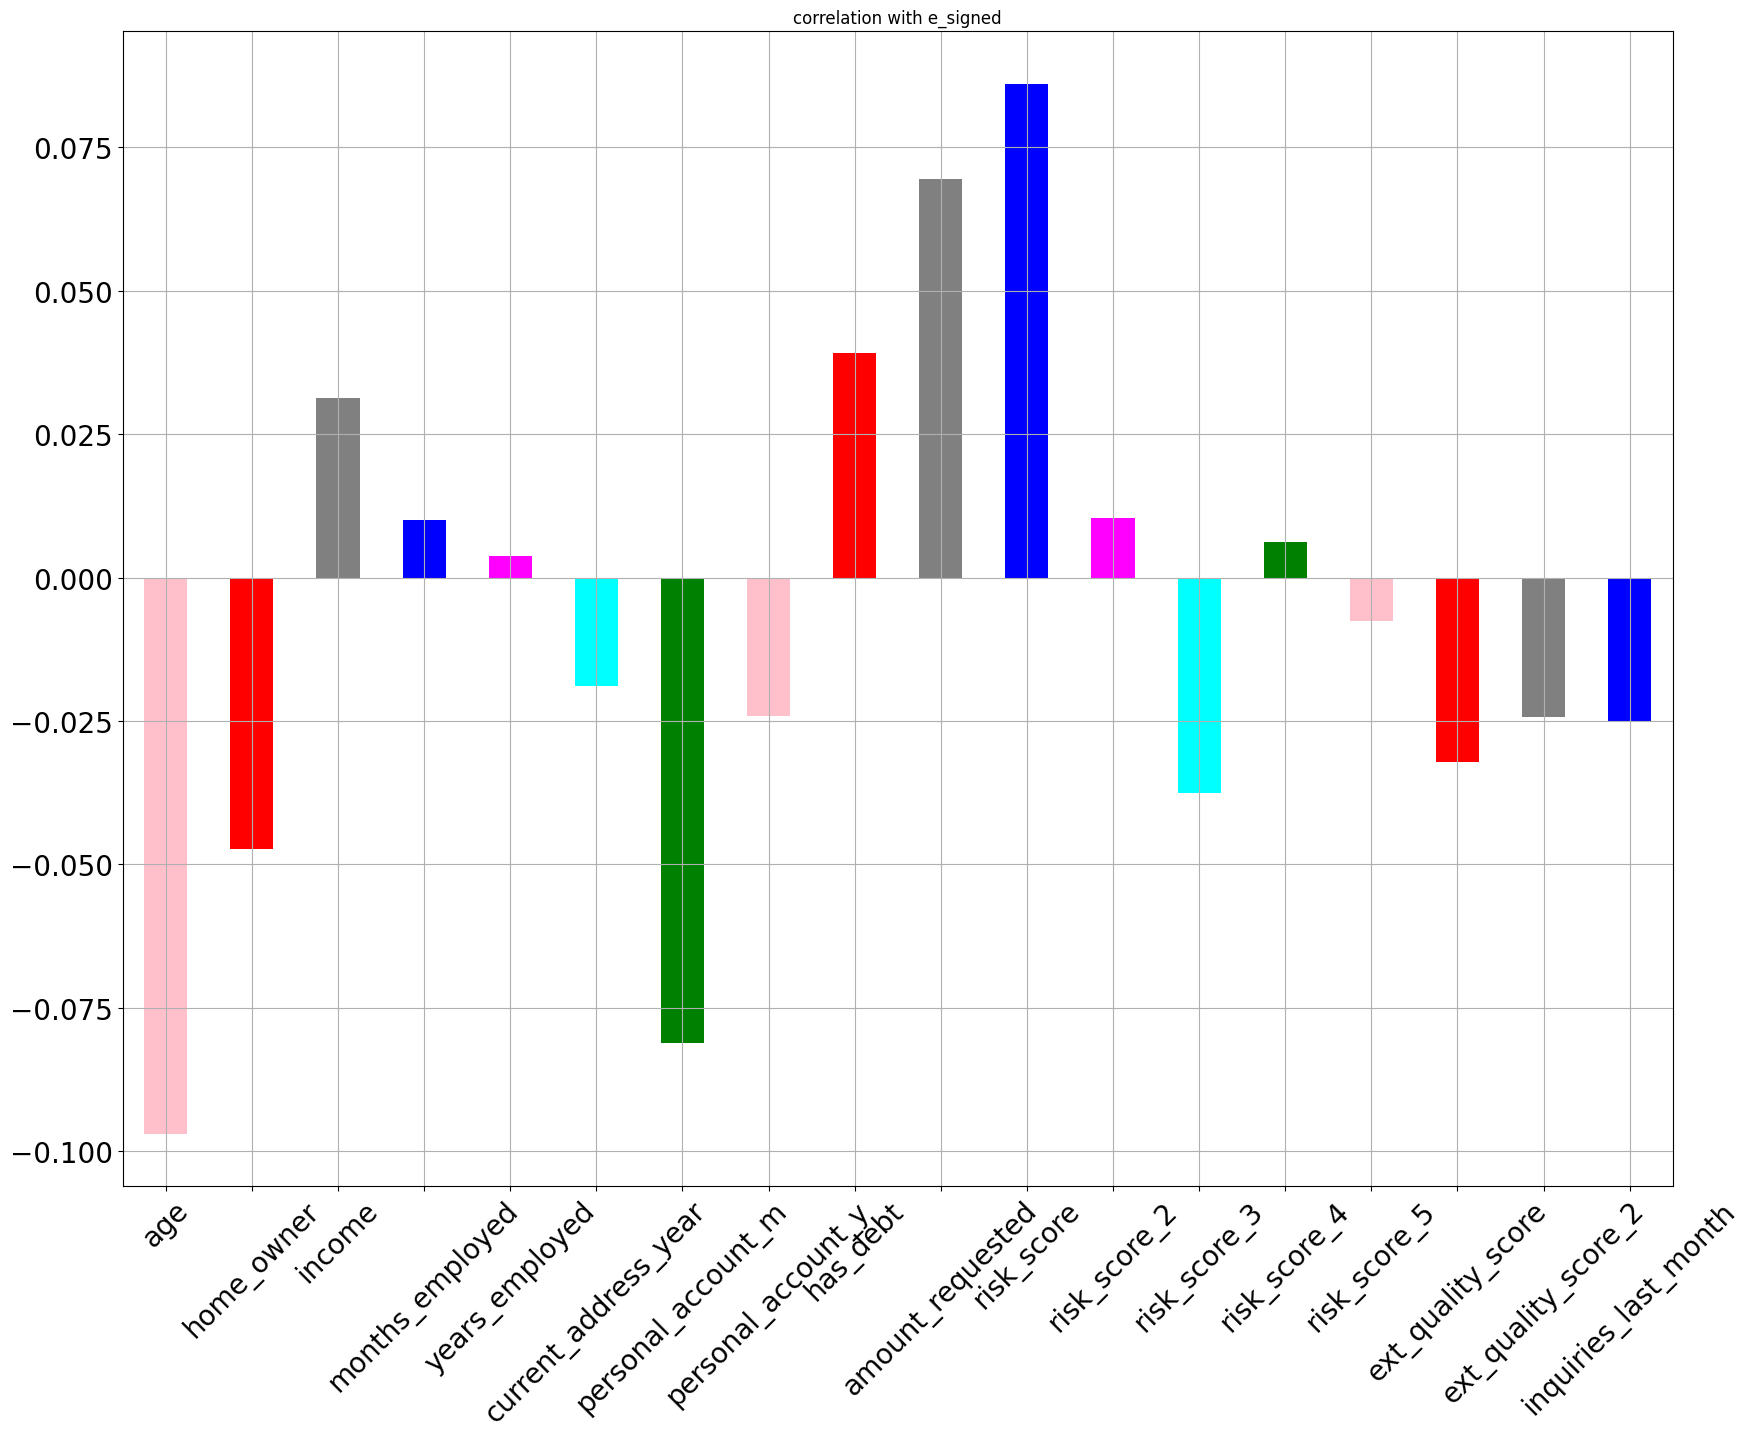

In [84]:
# correlation of independent with dependent variable
dataset2.corrwith(df.e_signed).plot.bar(figsize=(20,15),title="correlation with e_signed", fontsize=20,rot=45,grid=True,color=['pink','red','grey','blue','magenta','cyan','green'])

In [85]:
#Initiatizig into new variable and creating the dummy variable for categorical data
data=df
dummy=pd.get_dummies(data["pay_schedule"])

In [86]:
dummy

,bi-weekly,monthly,semi-monthly,weekly
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
17903,0,1,0,0
17904,1,0,0,0
17905,0,0,0,1
17906,1,0,0,0


In [87]:
dummy=dummy.drop(labels=["bi-weekly"],axis=1)
data=data.drop(["pay_schedule"],axis=1)
data=pd.concat([data,dummy],axis=1)
data.shape

(17908, 23)

In [88]:
# Seperating the data into dependent and independent varioable. Response contains the esigned column which needs to be computed
#from the dataset
response = data["e_signed"]
dataset = data.drop(columns = ["e_signed", "entry_id"])

#Transforming the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()

# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,response,test_size = 0.2,random_state = 0)

In [89]:
#Fitting and transforming our data
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

X_train.shape

(14326, 21)

### **Feature engineering**

In [90]:
df = pd.get_dummies(df, drop_first=True)  #one hotencoding all the dataset as, the purpuse is to one hot encode the pay_Scedule column

In [91]:
px.histogram(df, x="e_signed",color="e_signed", width=600, height=450)

In [92]:
df['months employed']  = ( df.months_employed + df.years_employed * 12 )  # creating a new column months employed with the total of months employed
df['personal accounts months']  = ( df.personal_account_m + df.personal_account_y * 12 )  # creating a new column ['personal accounts months'] with the total months of personal account

#Removing the unwanted columns
df = df.drop(columns = ['months_employed', 'years_employed', 'entry_id', 'personal_account_m', 'personal_account_y'] )  #droping the columns ['months_employed', 'years_employed', 'Entry_id', 'personal_account_m', 'personal_account_y'] as we dont need them any more

Correlation

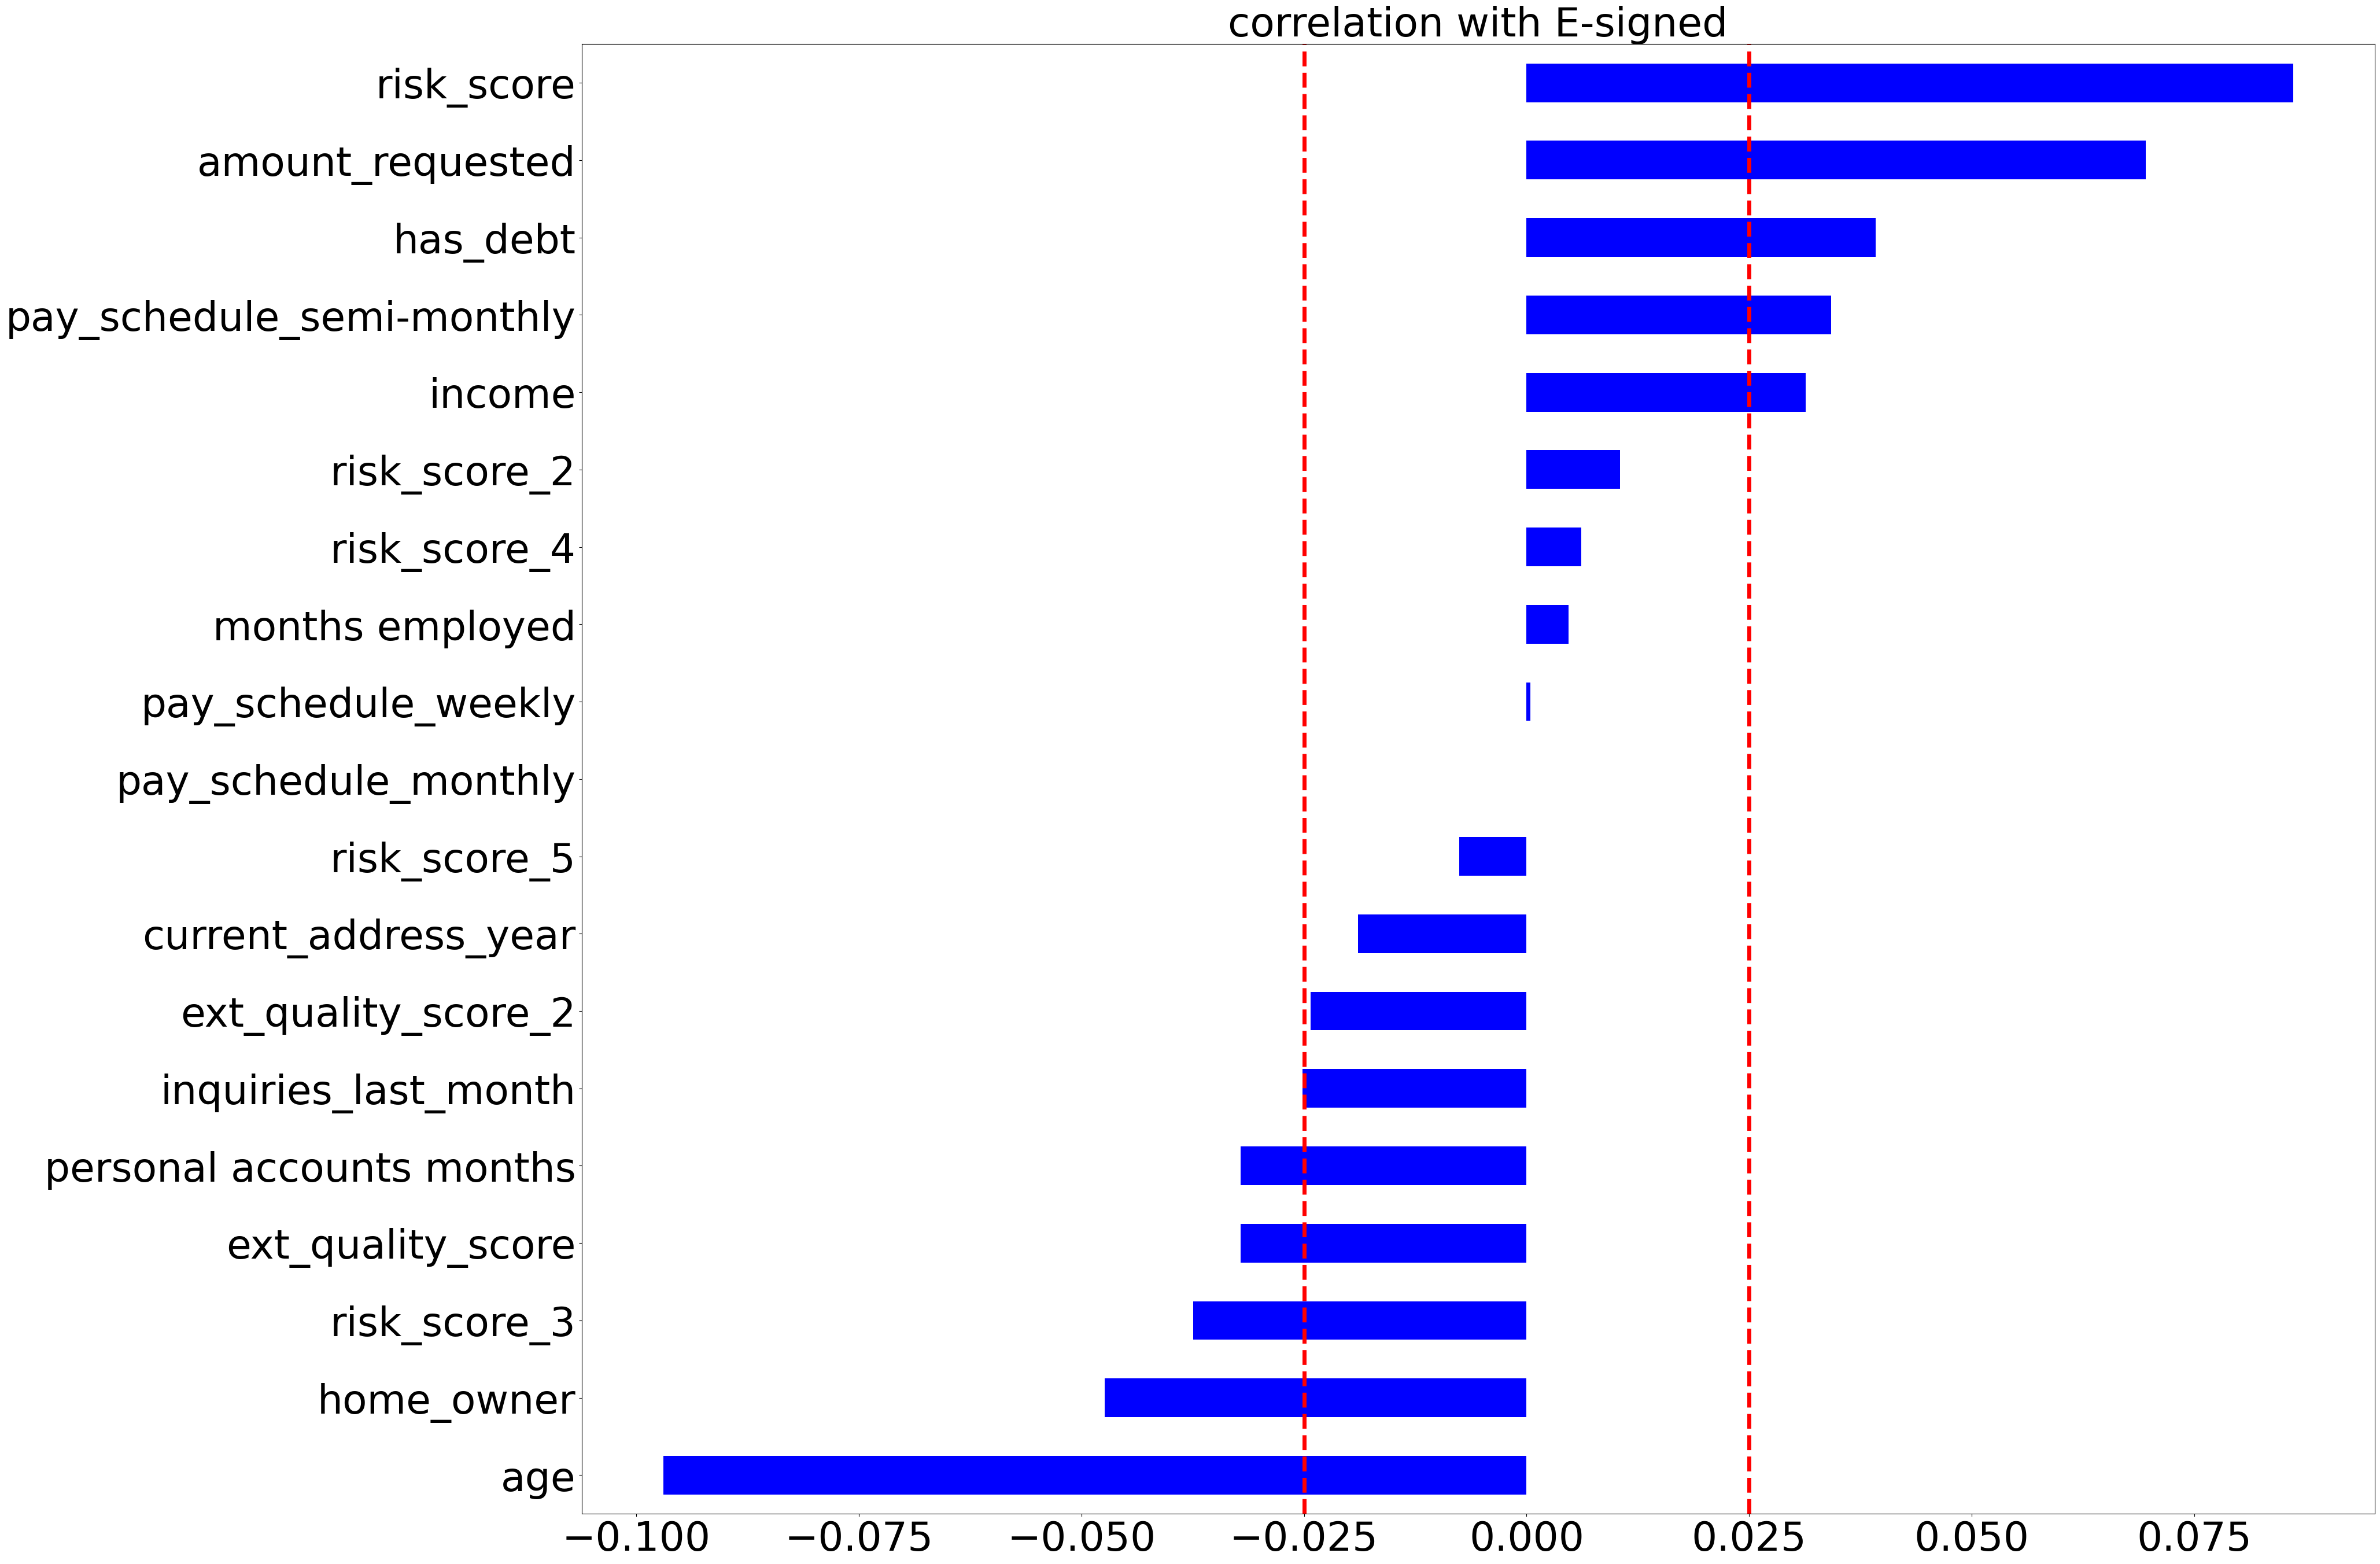

In [93]:
# calculate the correlation between features and target variable
corro=(df.corrwith(df['e_signed']))
del corro['e_signed'] #deleting the corroltaion of ['e_signed'] with it self because it is for no use in corrolation chart
# sort the correlation values in ascending order and plot them as horizontal bar chart
corro.sort_values(ascending=True).plot(kind='barh',
                                             color='blue',
                                             figsize=(40,33),
                                             fontsize=50)
# title to the chart
plt.title("correlation with E-signed", fontsize=50)
# add vertical lines to indicate high correlation thresholds
plt.axvline(x = 0.025, ymin = 0, ymax = 1,linewidth = 5, linestyle ="--",color ='red');
plt.axvline(x = -0.025, ymin = 0, ymax = 1,linewidth = 5, linestyle ="--",color ='red');


Text(220.58159722222223, 0.5, 'Features')

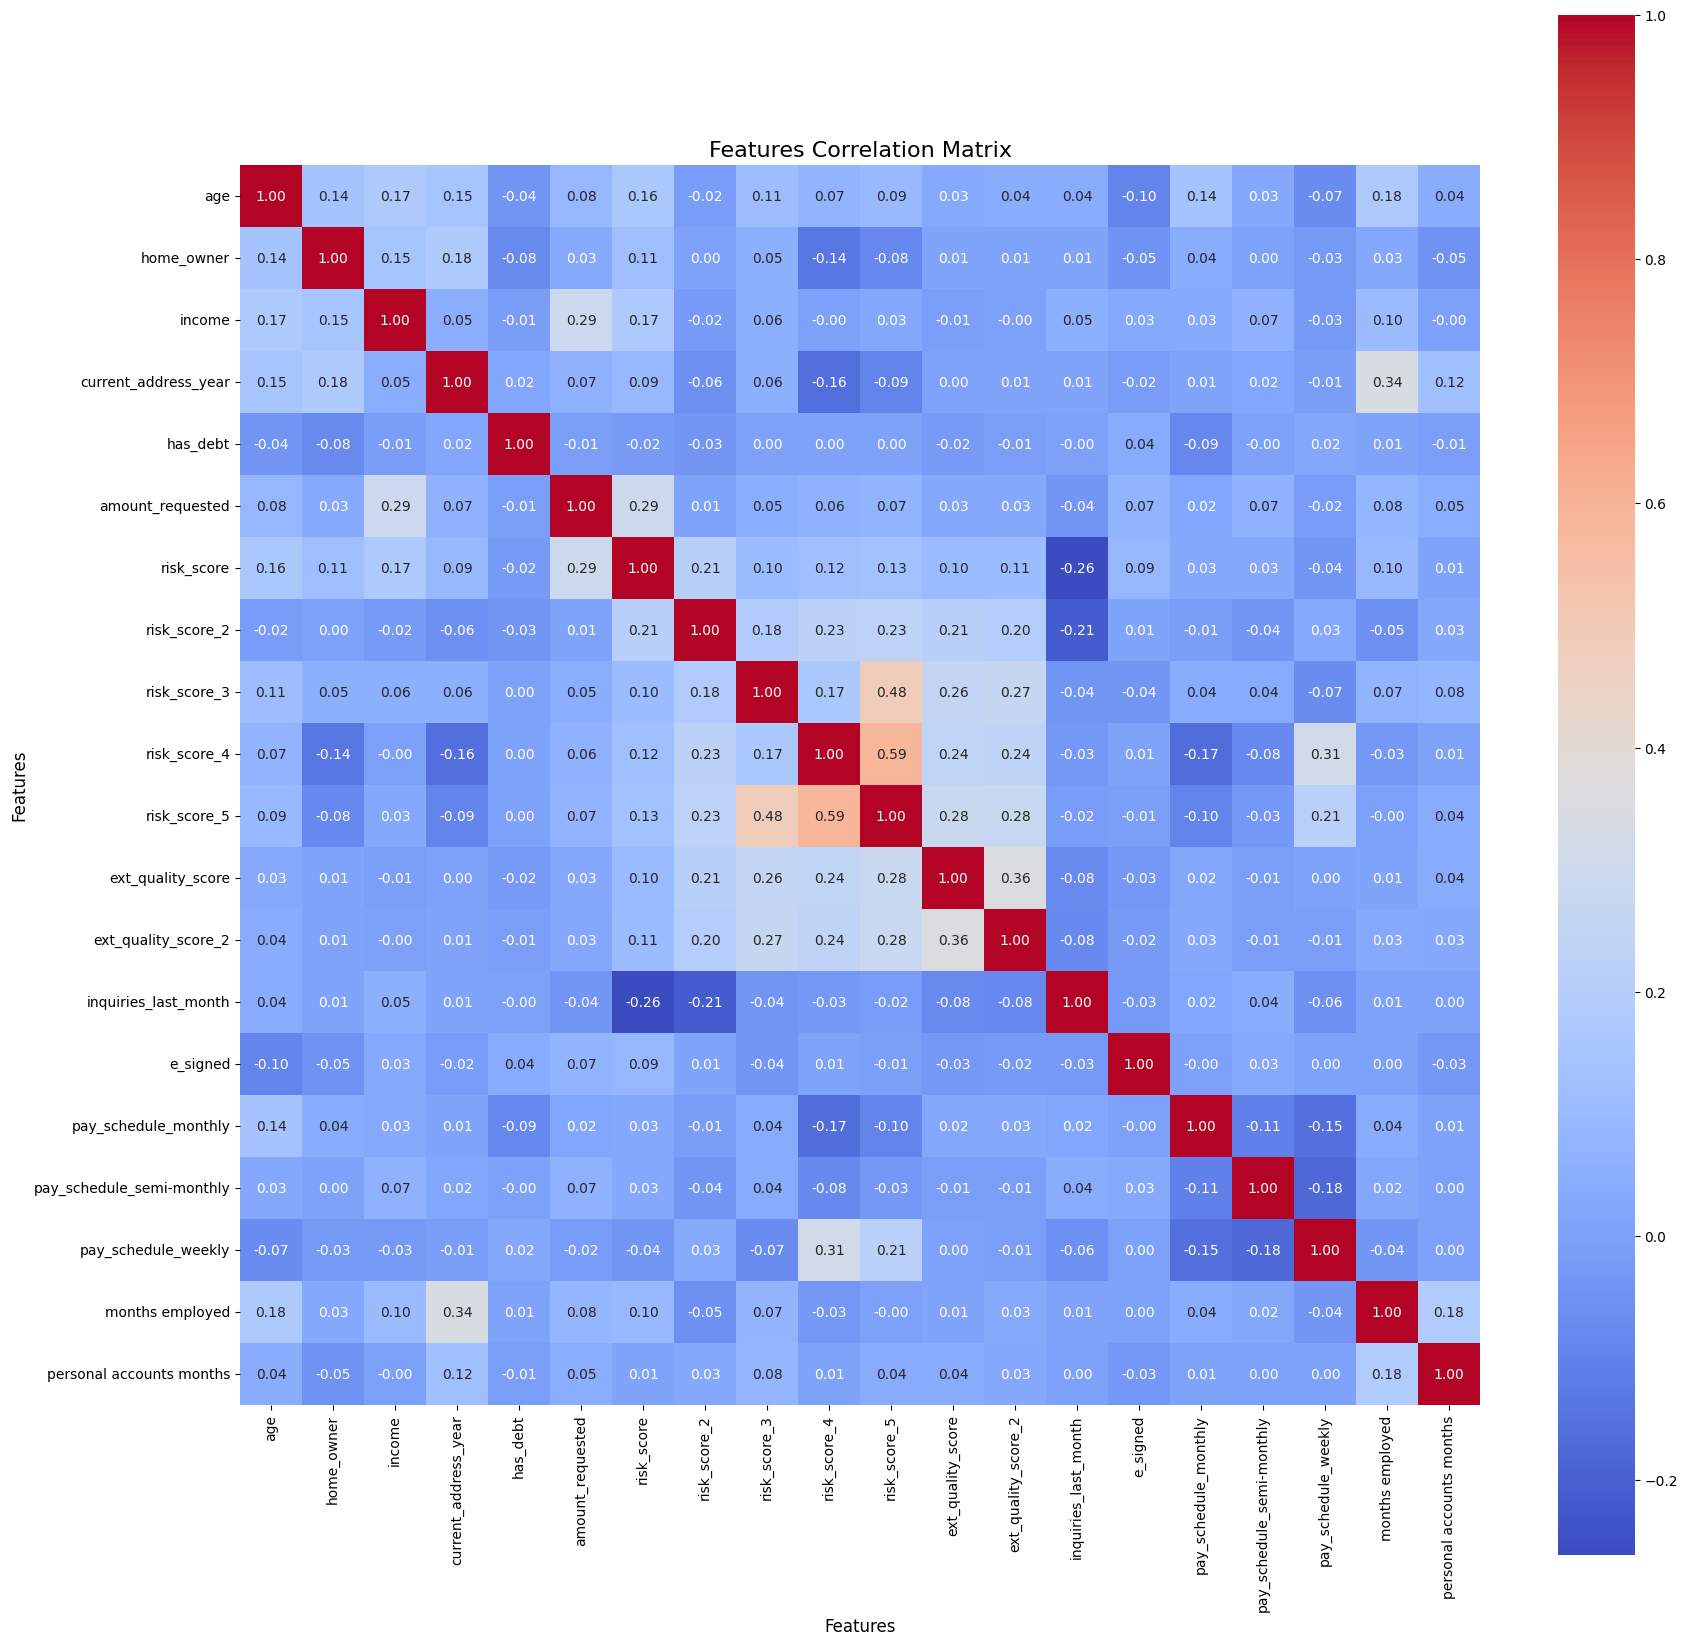

In [94]:
# Plotting a Heatmap to see in depth corrolation
corr = df.corr()  #Defining a corrolation variavle (Corrolation Matrix)
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', square=True)

# Adding title and labels to the plot
plt.title('Features Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

### Splitting the dataset

In [95]:
X = df.drop(columns='e_signed')   #creating a features variable X excluding the target valriable
y = df['e_signed']    #creating a target variable y and asigning the target fariable

# spitting the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #Applying Train & Test split

print(f'X_train',X_train.shape)  #Printing the X_train Features Shape
print(f'y_train',y_train.shape)  #Printing the y_train Labels Shape
print(f'X_test',X_test.shape)    #Printing the X_test Features Shape
print(f'y_test',y_test.shape)    #Printing the y_test Labels  Shape

X_train (14326, 19)
y_train (14326,)
X_test (3582, 19)
y_test (3582,)


In [96]:
ss= StandardScaler() #Defing the Ss variable as StandardScaler
X_train = ss.fit_transform(X_train) #Appling the fit Transform on the X_train
X_test = ss.transform(X_test) #Appling only transform on X_test to avoid Overfitting

# ***Machine Learning Models***

---



## Logistic Regression Model

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV
import warnings  # ignore all warnings
warnings.filterwarnings('ignore')

In [98]:
# Model Building
clf_lr = LogisticRegression(random_state=0) #Creating the Logistic Regression Model
clf_lr.fit(X_train, y_train)                #Training the Model with X_train & y_train
pred = clf_lr.predict(X_test)                #Predicting the X_test

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score
rec  = recall_score(y_test, pred)     # Getting the recall Score
prec = precision_score(y_test, pred)  # Getting the Precision Score
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix

#Defining a DataFrame
results = pd.DataFrame([['Logistic Regression', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

#Printing the Model Results with different Metrics
results


,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.562814,0.634965,0.706432,0.57663


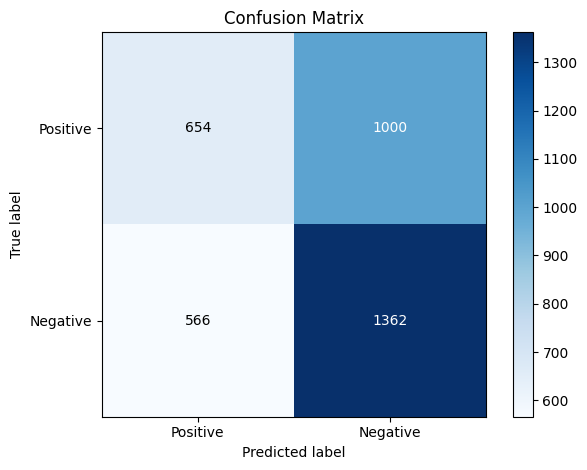

In [99]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [100]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_lr, X=X_train, y=y_train, cv=10)
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 57.741328696682736
Standard Deviation is: 0.9157162022604375


## Random Forest Classifier Model

In [101]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV
import warnings  # ignore all warnings
warnings.filterwarnings('ignore')

In [102]:

  #Building the model
clf_rf = RandomForestClassifier(random_state=0)#Creating the Random Forest Classifier Model
clf_rf.fit(X_train, y_train)                   #Training the Model with X_train & y_train
pred = clf_rf.predict(X_test)                  #Predicting the X_test

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score
rec  = recall_score(y_test, pred)     # Getting the recall Score
prec = precision_score(y_test, pred)  # Getting the Precision Score
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix

#Defining a DataFrame
rf_results = pd.DataFrame([['Random Forest Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(rf_results, ignore_index=True)


#Printing the Model Results with different Metrics
results


,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.562814,0.634965,0.706432,0.576630
1,Random Forest Classifier,0.632328,0.664800,0.677386,0.652674


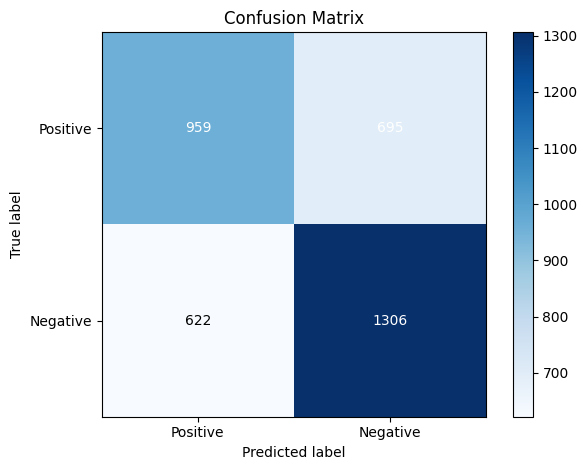

In [103]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [104]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_rf, X=X_train, y=y_train, cv=10)
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 62.62063023621188
Standard Deviation is: 1.5698269436752117


## Support Vector Classifier Model

In [105]:
from sklearn.svm import SVC

In [106]:
#Building the model
clf_svc = SVC(random_state=0)#Creating the Random Forest Classifier Model
clf_svc.fit(X_train, y_train)                   #Training the Model with X_train & y_train
pred = clf_svc.predict(X_test)                  #Predicting the X_test

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score
rec  = recall_score(y_test, pred)     # Getting the recall Score
prec = precision_score(y_test, pred)  # Getting the Precision Score
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix

#Defining a DataFrame
svm_results = pd.DataFrame([['Support Vector Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(svm_results, ignore_index=True)


#Printing the Model Results with different Metrics
results


,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.562814,0.634965,0.706432,0.576630
1,Random Forest Classifier,0.632328,0.664800,0.677386,0.652674
2,Support Vector Classifier,0.594640,0.647402,0.691390,0.608676


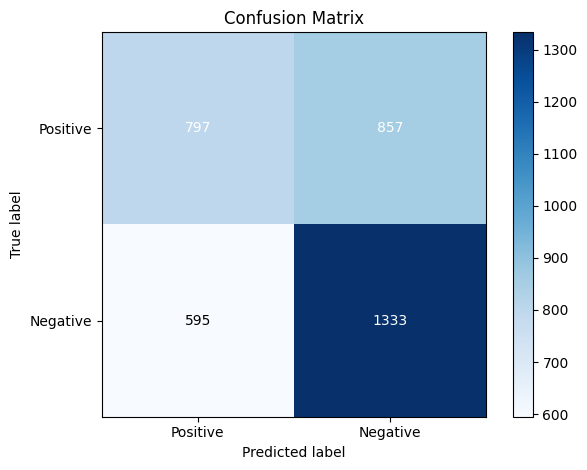

In [107]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [108]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_svc, X=X_train, y=y_train, cv=10)
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 61.126928309948646
Standard Deviation is: 1.331406556355814


## Decision Tree Classifier Model

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
#Building the model
clf_dt = DecisionTreeClassifier(random_state=0)#Creating the Random Forest Classifier Model
clf_dt.fit(X_train, y_train)                   #Training the Model with X_train & y_train
pred = clf_dt.predict(X_test)                  #Predicting the X_test

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score
rec  = recall_score(y_test, pred)     # Getting the recall Score
prec = precision_score(y_test, pred)  # Getting the Precision Score
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix

#Defining a DataFrame
dt_results = pd.DataFrame([['Decision Tree Classifier', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])
results = results.append(dt_results, ignore_index=True)


#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.562814,0.634965,0.706432,0.576630
1,Random Forest Classifier,0.632328,0.664800,0.677386,0.652674
2,Support Vector Classifier,0.594640,0.647402,0.691390,0.608676
3,Decision Tree Classifier,0.573423,0.598106,0.589730,0.606724


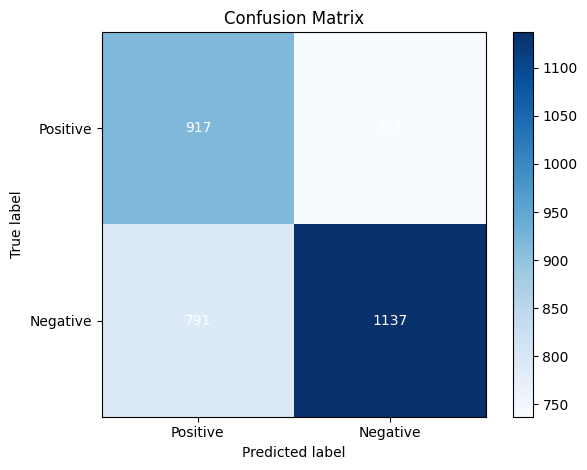

In [111]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [112]:
# Cross Validation
accuracies = cross_val_score(estimator=clf_dt, X=X_train, y=y_train, cv=10)
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 56.7084329082637
Standard Deviation is: 1.3469736852127605


# Final Model

In [113]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [114]:
# Model Building
final_clf = GradientBoostingClassifier(learning_rate=0.05, loss='exponential', max_depth=7,
                           random_state=42, subsample=0.8)
final_clf.fit(X_train, y_train)                 #Training the Model with X_train & y_train
pred = final_clf.predict(X_test)                #Predicting the X_test

#Testing the model accuracy with different paramtes
acc  = accuracy_score(y_test, pred)   # Getting the Accuracy Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score
rec  = recall_score(y_test, pred)     # Getting the recall Score
prec = precision_score(y_test, pred)  # Getting the Precision Score
cm   = confusion_matrix(y_test, pred) # Getting the confusion Matrix

#Defining a DataFrame
final_clf_results = pd.DataFrame([['Final Results', acc, f1, rec, prec]],
                      columns=['Model', 'Accuracy_Score', 'F1_Score', 'Recall_Score', 'Precision_Score'])

results = results.append(final_clf_results, ignore_index=True)
#Printing the Model Results with different Metrics
results

,Model,Accuracy_Score,F1_Score,Recall_Score,Precision_Score
0,Logistic Regression,0.562814,0.634965,0.706432,0.576630
1,Random Forest Classifier,0.632328,0.664800,0.677386,0.652674
2,Support Vector Classifier,0.594640,0.647402,0.691390,0.608676
3,Decision Tree Classifier,0.573423,0.598106,0.589730,0.606724
4,Final Results,0.637912,0.675993,0.701763,0.652048


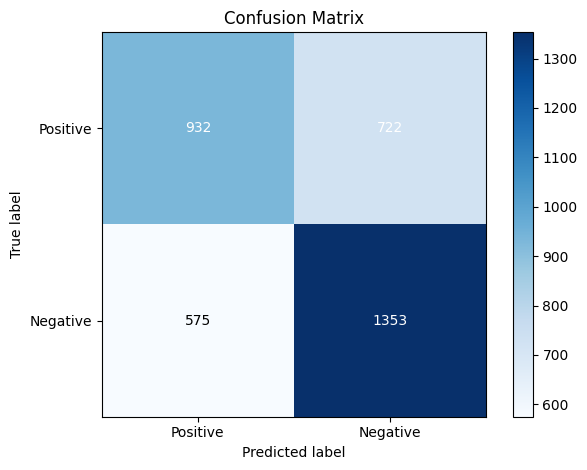

In [115]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [116]:
# Cross Validation
accuracies = cross_val_score(estimator=final_clf, X=X_train, y=y_train, cv=10)
print(f'Accuracy is:', format(accuracies.mean()*100))  #Printing the Mean of the accuracies
print(f'Standard Deviation is:',format(accuracies.std()*100)) #Printing the Standard Deviation of accuracies

Accuracy is: 64.0514196493663
Standard Deviation is: 1.6423008110556865


## Predicting

In [117]:
unknown_data= [[26,0,4135,2,0,1000,56200,0.837398,0.703517,0.587712,0.615977,0.480918,0.580918,9,0,0,0,32,31]]
unknown_data = ss.transform(unknown_data)

In [118]:
final_clf.predict(ss.transform(unknown_data))

array([0])